[['Name', 'Cost', 'Pages'], ['Pride_and_Prejudice', '480', '451'], ['Jane_Eyre', '187', '274'], ['The_Portrait_of_Dorian_Gray', '193', '192'], ["Harry_Potter_and_the_Philosopher's_Stone", '587', '373'], ['Manacled', '1561', '862'], ["The_Handmaid's_Tale", '293', '288'], ['Redemption', '362', '662'], ['Crescent_City', '888', '887'], ['Kingdom_of_Thorns_and_Roses', '594', '490'], ['Throne_of_Glass', '594', '489'], ['Heiress_of_Fire', '559', '458'], ['Divergent', '392', '389'], ['Atonement', '189', '183'], ['Plus_one', '451', '651'], ['The_love_Hypothesis', '695', '695'], ['Shadow_and_bone', '450', '446'], ['Storm_and_storm', '490', '485'], ['LVVZA', '1459', '959'], ['A_Brief_History_of_Time', '451', '351'], ['Mortal_Instruments:City_of_Bones', '548', '540'], ['Falcon_and_Raven', '387', '474'], ['Heart_of_the_Serpent', '1093', '992'], ['Parallel_worlds', '387', '373'], ['Insulation', '661', '662'], ['Six_of_Ravens', '693', '688'], ['Kingdom_of_Wrath_and_Fog', '662', '662'], ['Collapse_and

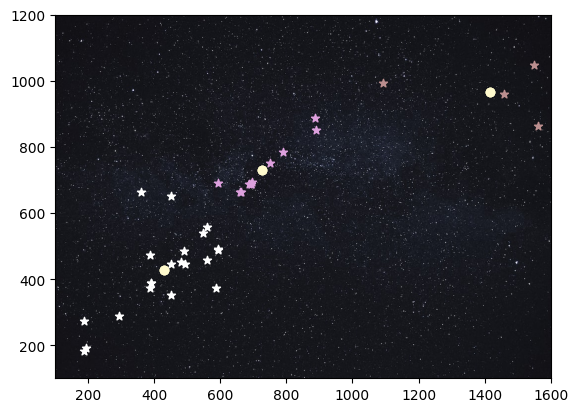

In [2]:
import csv
from matplotlib import pyplot as plt
import random
import math
#10 точек 1 итерация

k = 3  #Кластеры
final_tab = []
f = open('Book.csv') #Открываем файл
readf = csv.reader(f)
data = list(readf)
print(data)
del data[0]  #Удаление первой строки(заголовки)
for i in range(len(data)): #Удаляем столбец с названием
    del data[i][0]
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])
l = len(data[0])
print('Кол-во кластеров:', k)
print('Кол-во объектов:', str(len(data)))
colors = ['white','rosybrown','plum','skyblue','lightsalmon','slategrey','pink']
img = plt.imread('spb.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[100, 1600, 100, 1200])
#fig, ax = plt.subplots()
#ax.patch.set_facecolor('black')
#ax.patch.set_alpha(1.0)


def edist(x1, x2): #Евклидово расстояние
    L = 0
    for i in range(l):
        L += (x1[i] - x2[i]) ** 2
    return math.sqrt(L)


def claster(cent, data): #Создание кластеров и вычисление квадрата ошибки
    dist = []
    cl = []
    for i in range(len(data)):
        dist.append([])
        for j in range(k):
            dist[i].append(edist(cent[j], data[i]))
        cl.append(dist[i].index(min(dist[i])))
    E = 0 #Сумма квадратов ошибок
    for i in range(len(dist)):
        E += min(dist[i]) ** 2
    del dist
    return [cl, E]


def newcentroid():
    icl = tab[-1][0] #Какому кластеру принадлежит объект
    ks = []
    for i in range(k): #Заполняем 0
        ks.append([])
        for j in range(l):
            ks[i].append(0)
    for i in range(len(data)): #Складываем
        for j in range(l):
            ks[icl[i]][j] += data[i][j]
    for i in range(k): #Деление
        d = icl.count(i)
        for j in range(l):
            if d > 0:
                ks[i][j] /= d
    return ks


for it in range(50):
    tab = []
    centers = random.choices(data, k=k) #Выбор случайных координат кластеров
    tab.append(claster(centers, data) + centers)
    while(True):
        centers = newcentroid()
        tab.append(claster(centers, data) + centers)
        if tab[-1] == tab[-2]:
            del tab[-1]
            break
    final_tab.append(tab[-1])


print('Координаты центров кластеров:')

d = lambda x: x[1]
final_tab.sort(key=d)
for i in range(k):
    print(i + 1,':', final_tab[0][2:][i])

for m in range(k): #Вывод в картинке
    for n in range(len(final_tab[0][0])):
        if final_tab[0][0][n] == m:
            plt.scatter(data[n][0], data[n][1], marker='*', color=colors[m], )
    for c in final_tab[0][2:]:
        plt.scatter(c[0], c[1], marker='o', color='lemonchiffon')
plt.show()